In [19]:
import sys

In [20]:
sys.path.append(r'../HelperFunctions')

In [21]:
import DataHelper as dh
import AugHelper as ah
import ModelConfigHelper as mch

In [22]:
training = dh.getFileDirectory(fetchType='file')

Please enter the root directory of the file path -> C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fruit-Recommender\Dataset\data\fruits_data\Training_set.csv


In [23]:
import pandas as pd

In [24]:
df = pd.read_csv(training['path'])

In [25]:
df

,filename,label
0,Image_1.jpg,Pear 2
1,Image_2.jpg,Tomato Heart
2,Image_3.jpg,Plum 3
3,Image_4.jpg,Pear Stone
4,Image_5.jpg,Cherry 2
...,...,...
47379,Image_47380.jpg,Grape Pink
47380,Image_47381.jpg,Melon Piel de Sapo
47381,Image_47382.jpg,Grape White 3
47382,Image_47383.jpg,Avocado


In [14]:
fol = dh.getFileDirectory()

Please enter the root directory of the file path -> C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fruit-Recommender\Dataset\data\fruits_data\train


In [29]:
for idx in range(len(df['filename'])):
    df.iloc[idx,0] = os.path.join(fol['path'],df.iloc[idx,0])

In [30]:
df.iloc[0,0]

'C:\\Users\\user\\Desktop\\ML\\PyTorch\\Hackathon\\Fruit-Recommender\\Dataset\\data\\fruits_data\\train\\Image_1.jpg'

In [31]:
df

,filename,label
0,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Pear 2
1,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Tomato Heart
2,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Plum 3
3,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Pear Stone
4,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Cherry 2
...,...,...
47379,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Grape Pink
47380,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Melon Piel de Sapo
47381,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Grape White 3
47382,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Avocado


In [32]:
df['augmentation'] = 'normal'

In [33]:
df

,filename,label,augmentation
0,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Pear 2,normal
1,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Tomato Heart,normal
2,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Plum 3,normal
3,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Pear Stone,normal
4,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Cherry 2,normal
...,...,...,...
47379,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Grape Pink,normal
47380,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Melon Piel de Sapo,normal
47381,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Grape White 3,normal
47382,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,Avocado,normal


In [35]:
df['label'] = pd.Categorical(df['label'])

In [36]:
dictlabel = dh.getLabelDicts(df=df)

In [37]:
dictlabel

Index(['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1',
       'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith',
       'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3',
       ...
       'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Heart',
       'Tomato Maroon', 'Tomato Yellow', 'Tomato not Ripened', 'Walnut',
       'Watermelon'],
      dtype='object', length=131)

In [38]:
df = dh.dfPreProcess(df=df)

In [39]:
df

,filename,augmentation,ylabel
0,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,normal,84
1,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,normal,125
2,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,normal,104
3,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,normal,90
4,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,normal,27
...,...,...,...
47379,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,normal,45
47380,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,normal,68
47381,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,normal,48
47382,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Fru...,normal,14


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_val = train_test_split(df,test_size=0.2)

In [42]:
imgTransform = ah.getImageTransform(224)

In [43]:
imgTransform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [44]:
train_ds = ah.KroniaDataset(data=X_train,transforms=imgTransform)
val_ds = ah.KroniaDataset(data=X_val,transforms=imgTransform)

In [45]:
import torch
from torch.utils.data import DataLoader

In [46]:
train_dl = DataLoader(dataset=train_ds,batch_size=64,shuffle=True)
val_dl = DataLoader(dataset=val_ds,batch_size=64,shuffle=True)

In [47]:
from FruitModel import fruitRegModel

In [48]:
model = fruitRegModel()

In [53]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [54]:
train_loss,val_loss = mch.trainModel(model=model,train_dl=train_dl,val_dl=val_dl,criterion=criterion,optim=optimizer,train_samples=37907,batch_size=64,soft_max=False)

============= New Epoch =========================
epoch:  0  batch:    2 [   128/37907]  loss: 5.21500540      accuracy:   0.781%
epoch:  0  batch:    4 [   256/37907]  loss: 4.82504320      accuracy:   3.906%
epoch:  0  batch:    6 [   384/37907]  loss: 4.79028416      accuracy:   4.688%
epoch:  0  batch:    8 [   512/37907]  loss: 4.70712280      accuracy:   4.492%
epoch:  0  batch:   10 [   640/37907]  loss: 4.59189796      accuracy:   3.906%
epoch:  0  batch:   12 [   768/37907]  loss: 4.58426189      accuracy:   4.557%
epoch:  0  batch:   14 [   896/37907]  loss: 4.40591478      accuracy:   5.246%
epoch:  0  batch:   16 [  1024/37907]  loss: 3.97841740      accuracy:   6.152%
epoch:  0  batch:   18 [  1152/37907]  loss: 3.88925242      accuracy:   6.858%
epoch:  0  batch:   20 [  1280/37907]  loss: 3.57868314      accuracy:   7.812%
epoch:  0  batch:   22 [  1408/37907]  loss: 3.51194048      accuracy:   9.020%
epoch:  0  batch:   24 [  1536/37907]  loss: 2.98036456      accuracy:

epoch:  0  batch:  206 [ 13184/37907]  loss: 0.11526383      accuracy:  74.242%
epoch:  0  batch:  208 [ 13312/37907]  loss: 0.17117961      accuracy:  74.437%
epoch:  0  batch:  210 [ 13440/37907]  loss: 0.03131530      accuracy:  74.665%
epoch:  0  batch:  212 [ 13568/37907]  loss: 0.15187328      accuracy:  74.860%
epoch:  0  batch:  214 [ 13696/37907]  loss: 0.19518130      accuracy:  75.044%
epoch:  0  batch:  216 [ 13824/37907]  loss: 0.03254223      accuracy:  75.268%
epoch:  0  batch:  218 [ 13952/37907]  loss: 0.09954025      accuracy:  75.459%
epoch:  0  batch:  220 [ 14080/37907]  loss: 0.26927146      accuracy:  75.639%
epoch:  0  batch:  222 [ 14208/37907]  loss: 0.17754556      accuracy:  75.838%
epoch:  0  batch:  224 [ 14336/37907]  loss: 0.07453016      accuracy:  76.032%
epoch:  0  batch:  226 [ 14464/37907]  loss: 0.08352308      accuracy:  76.210%
epoch:  0  batch:  228 [ 14592/37907]  loss: 0.19993345      accuracy:  76.371%
epoch:  0  batch:  230 [ 14720/37907]  l

epoch:  0  batch:  412 [ 26368/37907]  loss: 0.03005108      accuracy:  85.547%
epoch:  0  batch:  414 [ 26496/37907]  loss: 0.16822332      accuracy:  85.605%
epoch:  0  batch:  416 [ 26624/37907]  loss: 0.01500636      accuracy:  85.667%
epoch:  0  batch:  418 [ 26752/37907]  loss: 0.06747904      accuracy:  85.724%
epoch:  0  batch:  420 [ 26880/37907]  loss: 0.07052352      accuracy:  85.785%
epoch:  0  batch:  422 [ 27008/37907]  loss: 0.07026024      accuracy:  85.845%
epoch:  0  batch:  424 [ 27136/37907]  loss: 0.05003014      accuracy:  85.904%
epoch:  0  batch:  426 [ 27264/37907]  loss: 0.04154168      accuracy:  85.963%
epoch:  0  batch:  428 [ 27392/37907]  loss: 0.02454899      accuracy:  86.025%
epoch:  0  batch:  430 [ 27520/37907]  loss: 0.06875146      accuracy:  86.076%
epoch:  0  batch:  432 [ 27648/37907]  loss: 0.04370480      accuracy:  86.136%
epoch:  0  batch:  434 [ 27776/37907]  loss: 0.04176931      accuracy:  86.193%
epoch:  0  batch:  436 [ 27904/37907]  l

epoch:  1  batch:   24 [  1536/37907]  loss: 0.02379834      accuracy:  99.089%
epoch:  1  batch:   26 [  1664/37907]  loss: 0.01057865      accuracy:  99.159%
epoch:  1  batch:   28 [  1792/37907]  loss: 0.01812176      accuracy:  99.219%
epoch:  1  batch:   30 [  1920/37907]  loss: 0.08987819      accuracy:  99.167%
epoch:  1  batch:   32 [  2048/37907]  loss: 0.00488520      accuracy:  99.170%
epoch:  1  batch:   34 [  2176/37907]  loss: 0.00605532      accuracy:  99.219%
epoch:  1  batch:   36 [  2304/37907]  loss: 0.00107288      accuracy:  99.219%
epoch:  1  batch:   38 [  2432/37907]  loss: 0.00466251      accuracy:  99.260%
epoch:  1  batch:   40 [  2560/37907]  loss: 0.00752789      accuracy:  99.297%
epoch:  1  batch:   42 [  2688/37907]  loss: 0.01288342      accuracy:  99.330%
epoch:  1  batch:   44 [  2816/37907]  loss: 0.00884234      accuracy:  99.361%
epoch:  1  batch:   46 [  2944/37907]  loss: 0.00708773      accuracy:  99.355%
epoch:  1  batch:   48 [  3072/37907]  l

epoch:  1  batch:  230 [ 14720/37907]  loss: 0.02324182      accuracy:  99.198%
epoch:  1  batch:  232 [ 14848/37907]  loss: 0.04584546      accuracy:  99.199%
epoch:  1  batch:  234 [ 14976/37907]  loss: 0.04643749      accuracy:  99.199%
epoch:  1  batch:  236 [ 15104/37907]  loss: 0.00495845      accuracy:  99.206%
epoch:  1  batch:  238 [ 15232/37907]  loss: 0.04222635      accuracy:  99.199%
epoch:  1  batch:  240 [ 15360/37907]  loss: 0.04533580      accuracy:  99.199%
epoch:  1  batch:  242 [ 15488/37907]  loss: 0.00591235      accuracy:  99.193%
epoch:  1  batch:  244 [ 15616/37907]  loss: 0.00163115      accuracy:  99.193%
epoch:  1  batch:  246 [ 15744/37907]  loss: 0.00222796      accuracy:  99.187%
epoch:  1  batch:  248 [ 15872/37907]  loss: 0.00585960      accuracy:  99.194%
epoch:  1  batch:  250 [ 16000/37907]  loss: 0.04538175      accuracy:  99.181%
epoch:  1  batch:  252 [ 16128/37907]  loss: 0.02612237      accuracy:  99.182%
epoch:  1  batch:  254 [ 16256/37907]  l

epoch:  1  batch:  436 [ 27904/37907]  loss: 0.03674836      accuracy:  99.093%
epoch:  1  batch:  438 [ 28032/37907]  loss: 0.11081155      accuracy:  99.083%
epoch:  1  batch:  440 [ 28160/37907]  loss: 0.00504778      accuracy:  99.084%
epoch:  1  batch:  442 [ 28288/37907]  loss: 0.01718309      accuracy:  99.084%
epoch:  1  batch:  444 [ 28416/37907]  loss: 0.04012781      accuracy:  99.067%
epoch:  1  batch:  446 [ 28544/37907]  loss: 0.00390909      accuracy:  99.072%
epoch:  1  batch:  448 [ 28672/37907]  loss: 0.02682833      accuracy:  99.072%
epoch:  1  batch:  450 [ 28800/37907]  loss: 0.01165361      accuracy:  99.073%
epoch:  1  batch:  452 [ 28928/37907]  loss: 0.01084409      accuracy:  99.077%
epoch:  1  batch:  454 [ 29056/37907]  loss: 0.01054876      accuracy:  99.081%
epoch:  1  batch:  456 [ 29184/37907]  loss: 0.06937219      accuracy:  99.082%
epoch:  1  batch:  458 [ 29312/37907]  loss: 0.07330287      accuracy:  99.079%
epoch:  1  batch:  460 [ 29440/37907]  l

epoch:  2  batch:   48 [  3072/37907]  loss: 0.01425742      accuracy:  98.665%
epoch:  2  batch:   50 [  3200/37907]  loss: 0.01007170      accuracy:  98.656%
epoch:  2  batch:   52 [  3328/37907]  loss: 0.03948800      accuracy:  98.588%
epoch:  2  batch:   54 [  3456/37907]  loss: 0.02005475      accuracy:  98.611%
epoch:  2  batch:   56 [  3584/37907]  loss: 0.00371239      accuracy:  98.633%
epoch:  2  batch:   58 [  3712/37907]  loss: 0.01790884      accuracy:  98.680%
epoch:  2  batch:   60 [  3840/37907]  loss: 0.18611288      accuracy:  98.646%
epoch:  2  batch:   62 [  3968/37907]  loss: 0.02278667      accuracy:  98.690%
epoch:  2  batch:   64 [  4096/37907]  loss: 0.00942277      accuracy:  98.730%
epoch:  2  batch:   66 [  4224/37907]  loss: 0.00088046      accuracy:  98.698%
epoch:  2  batch:   68 [  4352/37907]  loss: 0.02399190      accuracy:  98.713%
epoch:  2  batch:   70 [  4480/37907]  loss: 0.00820830      accuracy:  98.750%
epoch:  2  batch:   72 [  4608/37907]  l

epoch:  2  batch:  254 [ 16256/37907]  loss: 0.02010751      accuracy:  98.837%
epoch:  2  batch:  256 [ 16384/37907]  loss: 0.07846460      accuracy:  98.834%
epoch:  2  batch:  258 [ 16512/37907]  loss: 0.00058477      accuracy:  98.843%
epoch:  2  batch:  260 [ 16640/37907]  loss: 0.00126948      accuracy:  98.852%
epoch:  2  batch:  262 [ 16768/37907]  loss: 0.00545528      accuracy:  98.855%
epoch:  2  batch:  264 [ 16896/37907]  loss: 0.00346092      accuracy:  98.864%
epoch:  2  batch:  266 [ 17024/37907]  loss: 0.03343251      accuracy:  98.860%
epoch:  2  batch:  268 [ 17152/37907]  loss: 0.00139534      accuracy:  98.869%
epoch:  2  batch:  270 [ 17280/37907]  loss: 0.00502229      accuracy:  98.877%
epoch:  2  batch:  272 [ 17408/37907]  loss: 0.00088198      accuracy:  98.886%
epoch:  2  batch:  274 [ 17536/37907]  loss: 0.03667178      accuracy:  98.888%
epoch:  2  batch:  276 [ 17664/37907]  loss: 0.00090559      accuracy:  98.890%
epoch:  2  batch:  278 [ 17792/37907]  l

epoch:  2  batch:  460 [ 29440/37907]  loss: 0.00478432      accuracy:  99.062%
epoch:  2  batch:  462 [ 29568/37907]  loss: 0.00380294      accuracy:  99.067%
epoch:  2  batch:  464 [ 29696/37907]  loss: 0.04181284      accuracy:  99.060%
epoch:  2  batch:  466 [ 29824/37907]  loss: 0.04860180      accuracy:  99.061%
epoch:  2  batch:  468 [ 29952/37907]  loss: 0.02748282      accuracy:  99.062%
epoch:  2  batch:  470 [ 30080/37907]  loss: 0.11456751      accuracy:  99.062%
epoch:  2  batch:  472 [ 30208/37907]  loss: 0.00347116      accuracy:  99.063%
epoch:  2  batch:  474 [ 30336/37907]  loss: 0.00639415      accuracy:  99.064%
epoch:  2  batch:  476 [ 30464/37907]  loss: 0.05503078      accuracy:  99.058%
epoch:  2  batch:  478 [ 30592/37907]  loss: 0.11478201      accuracy:  99.055%
epoch:  2  batch:  480 [ 30720/37907]  loss: 0.00349439      accuracy:  99.059%
epoch:  2  batch:  482 [ 30848/37907]  loss: 0.07985026      accuracy:  99.057%
epoch:  2  batch:  484 [ 30976/37907]  l

epoch:  3  batch:   72 [  4608/37907]  loss: 0.19345760      accuracy:  99.653%
epoch:  3  batch:   74 [  4736/37907]  loss: 0.07033367      accuracy:  99.578%
epoch:  3  batch:   76 [  4864/37907]  loss: 0.01073675      accuracy:  99.527%
epoch:  3  batch:   78 [  4992/37907]  loss: 0.12072944      accuracy:  99.439%
epoch:  3  batch:   80 [  5120/37907]  loss: 0.15163845      accuracy:  99.355%
epoch:  3  batch:   82 [  5248/37907]  loss: 0.05335661      accuracy:  99.352%
epoch:  3  batch:   84 [  5376/37907]  loss: 0.00896070      accuracy:  99.312%
epoch:  3  batch:   86 [  5504/37907]  loss: 0.06431220      accuracy:  99.291%
epoch:  3  batch:   88 [  5632/37907]  loss: 0.08404668      accuracy:  99.254%
epoch:  3  batch:   90 [  5760/37907]  loss: 0.00510442      accuracy:  99.253%
epoch:  3  batch:   92 [  5888/37907]  loss: 0.07243292      accuracy:  99.236%
epoch:  3  batch:   94 [  6016/37907]  loss: 0.03043552      accuracy:  99.202%
epoch:  3  batch:   96 [  6144/37907]  l

epoch:  3  batch:  278 [ 17792/37907]  loss: 0.05840122      accuracy:  98.522%
epoch:  3  batch:  280 [ 17920/37907]  loss: 0.14252223      accuracy:  98.521%
epoch:  3  batch:  282 [ 18048/37907]  loss: 0.07303026      accuracy:  98.521%
epoch:  3  batch:  284 [ 18176/37907]  loss: 0.01463437      accuracy:  98.526%
epoch:  3  batch:  286 [ 18304/37907]  loss: 0.00701208      accuracy:  98.530%
epoch:  3  batch:  288 [ 18432/37907]  loss: 0.01645315      accuracy:  98.524%
epoch:  3  batch:  290 [ 18560/37907]  loss: 0.05927409      accuracy:  98.529%
epoch:  3  batch:  292 [ 18688/37907]  loss: 0.01243730      accuracy:  98.539%
epoch:  3  batch:  294 [ 18816/37907]  loss: 0.00970913      accuracy:  98.549%
epoch:  3  batch:  296 [ 18944/37907]  loss: 0.00332452      accuracy:  98.554%
epoch:  3  batch:  298 [ 19072/37907]  loss: 0.00147726      accuracy:  98.558%
epoch:  3  batch:  300 [ 19200/37907]  loss: 0.00186354      accuracy:  98.568%
epoch:  3  batch:  302 [ 19328/37907]  l

epoch:  3  batch:  484 [ 30976/37907]  loss: 0.10318373      accuracy:  98.806%
epoch:  3  batch:  486 [ 31104/37907]  loss: 0.00016348      accuracy:  98.807%
epoch:  3  batch:  488 [ 31232/37907]  loss: 0.00011385      accuracy:  98.812%
epoch:  3  batch:  490 [ 31360/37907]  loss: 0.00970168      accuracy:  98.817%
epoch:  3  batch:  492 [ 31488/37907]  loss: 0.00145324      accuracy:  98.822%
epoch:  3  batch:  494 [ 31616/37907]  loss: 0.00062791      accuracy:  98.827%
epoch:  3  batch:  496 [ 31744/37907]  loss: 0.00480568      accuracy:  98.831%
epoch:  3  batch:  498 [ 31872/37907]  loss: 0.00610324      accuracy:  98.836%
epoch:  3  batch:  500 [ 32000/37907]  loss: 0.00029880      accuracy:  98.841%
epoch:  3  batch:  502 [ 32128/37907]  loss: 0.00025339      accuracy:  98.842%
epoch:  3  batch:  504 [ 32256/37907]  loss: 0.00144129      accuracy:  98.844%
epoch:  3  batch:  506 [ 32384/37907]  loss: 0.00016006      accuracy:  98.848%
epoch:  3  batch:  508 [ 32512/37907]  l

epoch:  4  batch:   96 [  6144/37907]  loss: 0.00002071      accuracy:  99.951%
epoch:  4  batch:   98 [  6272/37907]  loss: 0.00013362      accuracy:  99.952%
epoch:  4  batch:  100 [  6400/37907]  loss: 0.00043687      accuracy:  99.953%
epoch:  4  batch:  102 [  6528/37907]  loss: 0.00012399      accuracy:  99.954%
epoch:  4  batch:  104 [  6656/37907]  loss: 0.00400946      accuracy:  99.955%
epoch:  4  batch:  106 [  6784/37907]  loss: 0.00152171      accuracy:  99.956%
epoch:  4  batch:  108 [  6912/37907]  loss: 0.00014401      accuracy:  99.957%
epoch:  4  batch:  110 [  7040/37907]  loss: 0.00008653      accuracy:  99.957%
epoch:  4  batch:  112 [  7168/37907]  loss: 0.00425887      accuracy:  99.958%
epoch:  4  batch:  114 [  7296/37907]  loss: 0.00005851      accuracy:  99.959%
epoch:  4  batch:  116 [  7424/37907]  loss: 0.00004947      accuracy:  99.960%
epoch:  4  batch:  118 [  7552/37907]  loss: 0.00193967      accuracy:  99.960%
epoch:  4  batch:  120 [  7680/37907]  l

epoch:  4  batch:  302 [ 19328/37907]  loss: 0.00521847      accuracy:  99.907%
epoch:  4  batch:  304 [ 19456/37907]  loss: 0.00149288      accuracy:  99.907%
epoch:  4  batch:  306 [ 19584/37907]  loss: 0.00203918      accuracy:  99.908%
epoch:  4  batch:  308 [ 19712/37907]  loss: 0.01408129      accuracy:  99.899%
epoch:  4  batch:  310 [ 19840/37907]  loss: 0.00008600      accuracy:  99.894%
epoch:  4  batch:  312 [ 19968/37907]  loss: 0.00172764      accuracy:  99.895%
epoch:  4  batch:  314 [ 20096/37907]  loss: 0.00017289      accuracy:  99.891%
epoch:  4  batch:  316 [ 20224/37907]  loss: 0.00023009      accuracy:  99.891%
epoch:  4  batch:  318 [ 20352/37907]  loss: 0.00730377      accuracy:  99.892%
epoch:  4  batch:  320 [ 20480/37907]  loss: 0.01780191      accuracy:  99.888%
epoch:  4  batch:  322 [ 20608/37907]  loss: 0.00171085      accuracy:  99.879%
epoch:  4  batch:  324 [ 20736/37907]  loss: 0.00224480      accuracy:  99.879%
epoch:  4  batch:  326 [ 20864/37907]  l

epoch:  4  batch:  508 [ 32512/37907]  loss: 0.00757674      accuracy:  99.662%
epoch:  4  batch:  510 [ 32640/37907]  loss: 0.27917671      accuracy:  99.645%
epoch:  4  batch:  512 [ 32768/37907]  loss: 0.04188255      accuracy:  99.634%
epoch:  4  batch:  514 [ 32896/37907]  loss: 0.06704170      accuracy:  99.617%
epoch:  4  batch:  516 [ 33024/37907]  loss: 0.09844706      accuracy:  99.606%
epoch:  4  batch:  518 [ 33152/37907]  loss: 0.13812253      accuracy:  99.596%
epoch:  4  batch:  520 [ 33280/37907]  loss: 0.12237152      accuracy:  99.588%
epoch:  4  batch:  522 [ 33408/37907]  loss: 0.04077375      accuracy:  99.587%
epoch:  4  batch:  524 [ 33536/37907]  loss: 0.13257334      accuracy:  99.580%
epoch:  4  batch:  526 [ 33664/37907]  loss: 0.11781307      accuracy:  99.560%
epoch:  4  batch:  528 [ 33792/37907]  loss: 0.11449642      accuracy:  99.556%
epoch:  4  batch:  530 [ 33920/37907]  loss: 0.13478316      accuracy:  99.552%
epoch:  4  batch:  532 [ 34048/37907]  l

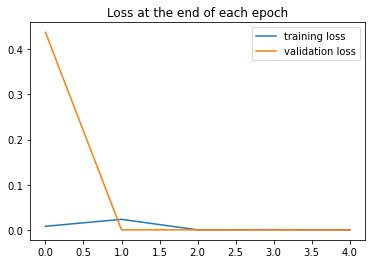

In [55]:
mch.visualiziseTrainResults(train_losses=train_loss,test_losses=val_loss)

In [58]:
# mch.saveModel(model=model,filename="FruitClassifier")